# 1. Necessary Imports

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
#import ydata_profiling
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
#from ydata_profiling import ProfileReport
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [2]:
from imblearn.over_sampling import RandomOverSampler


# 2. Dataset Summary

In [4]:
df = pd.read_csv('smoking_FYP.csv')

In [5]:
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [6]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [9]:
df.shape

(55692, 27)

In [6]:
df.describe(include='all')

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
count,55692.000000,55692,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692,55692.000000,55692,55692.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN
freq,NaN,35401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,55692,NaN,30940,NaN
mean,27845.500000,NaN,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,...,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,NaN,0.213334,NaN,0.367288
std,16077.039933,NaN,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,...,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,NaN,0.409665,NaN,0.482070
min,0.000000,NaN,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,...,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,NaN,0.000000,NaN,0.000000
25%,13922.750000,NaN,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,...,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,NaN,0.000000,NaN,0.000000
50%,27845.500000,NaN,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,...,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,NaN,0.000000,NaN,0.000000
75%,41768.250000,NaN,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,...,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,NaN,0.000000,NaN,1.000000


In [7]:
numerical_features = df.select_dtypes(include=['int', 'float']).columns
print("Numerical Features:")
print(numerical_features)
print("Count:")
print(len(numerical_features))

Numerical Features:
Index(['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')
Count:
24


In [8]:
categorical_features = df.select_dtypes(include=['object']).columns
print("Categorical Features:")
print(categorical_features)
print("Count:")
print(len(categorical_features))

Categorical Features:
Index(['gender', 'oral', 'tartar'], dtype='object')
Count:
3


In [9]:
discrete_features = [col for col, unique_count in df[numerical_features].nunique().items() if unique_count < 25]
continuous_features = [col for col in numerical_features if col not in discrete_features]
print("Discrete Features:", discrete_features)
print("Count:")
print(len(discrete_features))
print("Continuous Features:", continuous_features)
print("Count:")
print(len(continuous_features))

Discrete Features: ['age', 'height(cm)', 'weight(kg)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries', 'smoking']
Count:
10
Continuous Features: ['ID', 'waist(cm)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp']
Count:
14


In [10]:
# Unique values of cathegorical columns
print("Unique values for Oral column:", df["oral"].unique())
print("Unique values for Gender column:", df["gender"].unique())
print("Unique values for Tartar column:", df["tartar"].unique())

Unique values for Oral column: ['Y']
Unique values for Gender column: ['F' 'M']
Unique values for Tartar column: ['Y' 'N']


In [11]:
# Automated EDA report
#description = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
#description

# 3. Dataset Cleaning

In [7]:
# Dropping redundant columns
df = df.drop(['ID', 'gender', 'oral'], axis=1)

In [8]:
from sklearn.preprocessing import OneHotEncoder
#meeeeeeeeeeeeeeeeee here
ohe = OneHotEncoder(drop='if_binary',sparse=False, handle_unknown='ignore')
df[["tartar"]] = ohe.fit_transform(df[["tartar"]])

/home/roti/.pyenv/versions/3.10.6/envs/smoking/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
import pickle
with open('/home/roti/code/Majdlewag/smoking2/m_work/modelsv5/oher_pre.pkl', 'wb') as file:
    oher = pickle.dump(ohe, file)

In [10]:
df.head(3)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1.0,0
1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1.0,0
2,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0.0,1


In [13]:
# Encoding the 'Tartar' column
label_encoder = preprocessing.LabelEncoder()
df['tartar'] = label_encoder.fit_transform(df['tartar'])

In [11]:
# Combining together left and right eyesight and hearing
columns_to_replace = ['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']

df['eyesight'] = df[['eyesight(left)', 'eyesight(right)']].mean(axis=1)
df['hearing'] = df[['hearing(left)', 'hearing(right)']].mean(axis=1)
df = df.drop(['eyesight(left)', 'eyesight(right)','hearing(left)', 'hearing(right)'],axis = 1)

In [12]:
df.head(3)

,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking,eyesight,hearing
0,40,155,60,81.3,114.0,73.0,94.0,215.0,82.0,73.0,...,1.0,0.7,18.0,19.0,27.0,0,1.0,0,1.1,1.0
1,40,160,60,81.0,119.0,70.0,130.0,192.0,115.0,42.0,...,1.0,0.6,22.0,19.0,18.0,0,1.0,0,0.7,1.0
2,55,170,60,80.0,138.0,86.0,89.0,242.0,182.0,55.0,...,1.0,1.0,21.0,16.0,22.0,0,0.0,1,0.8,1.0


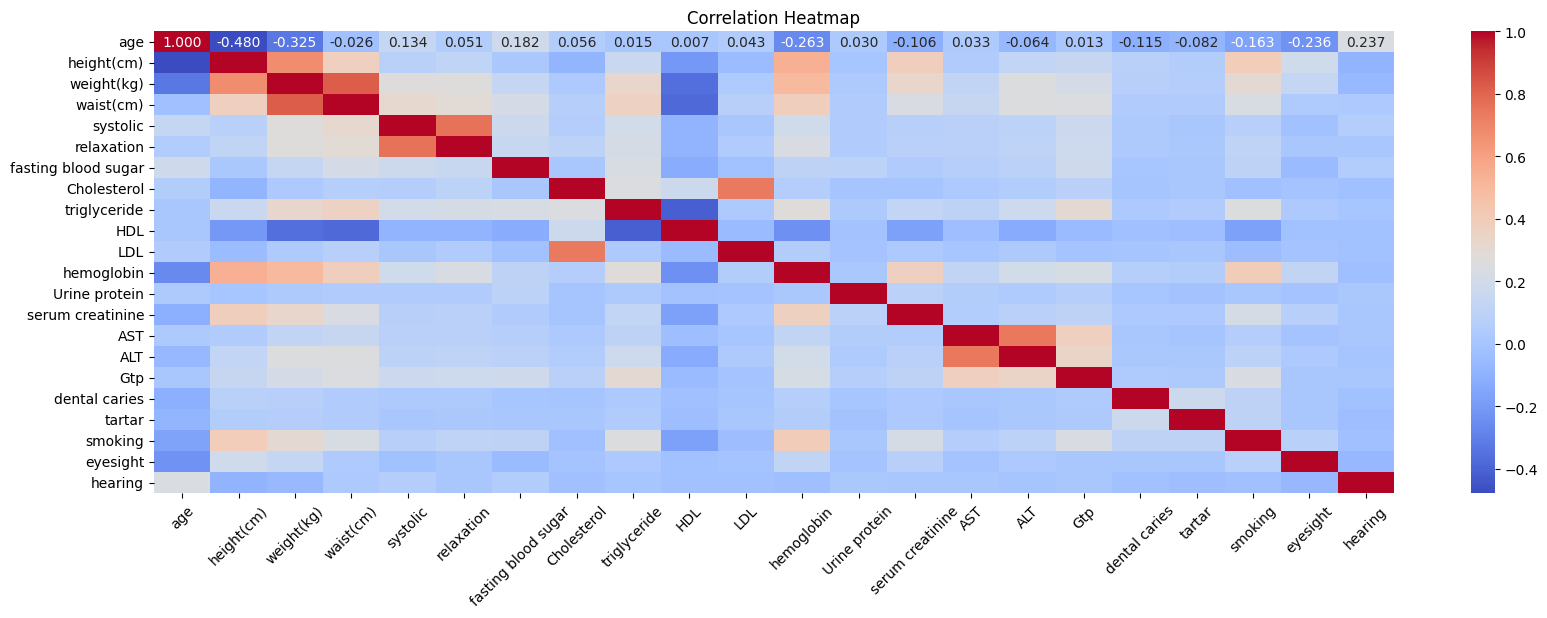

In [15]:
correlation_matrix = df.corr()
column_names = df.columns.tolist()

plt.figure(figsize=(20, 6))
heatmap =sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
heatmap.set_xticklabels(column_names, rotation=45)
heatmap.set_yticklabels(column_names, rotation=0)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
num_columns = df.shape[0]
new_df = df.drop(columns=['Urine protein']).copy()
print("Dataset size before filtering:", num_columns)

columns_of_interest = ['ALT','relaxation','triglyceride', 'AST','height(cm)','weight(kg)','waist(cm)' ,'fasting blood sugar','Cholesterol', 'triglyceride', 'HDL', 'LDL', 'serum creatinine', 'Gtp', 'systolic', 'hemoglobin']

# Filtering values within the quantile range for each column
for column in columns_of_interest:
    lower_quantile = 0.00
    upper_quantile = 0.97

    # Calculate the quantiles for the column
    lower_bound = new_df[column].quantile(lower_quantile)
    upper_bound = new_df[column].quantile(upper_quantile)

    # Filter the DataFrame based on the quantiles
    new_df = new_df[(new_df[column] >= lower_bound) & (new_df[column] <= upper_bound)]


num_columns = new_df.shape[0]
print("Dataset size after filtering:", num_columns)


Dataset size before filtering: 55692
Dataset size after filtering: 36133


In [14]:
new_df.shape

(36133, 21)

In [15]:
# Handling the inbalance in dataset
Y = new_df['smoking']
X = new_df.drop(['smoking'], axis=1)

RES = RandomOverSampler(random_state=42)
X, Y = RES.fit_resample(X, Y)
print(pd.DataFrame(Y).describe())
balanced_df = pd.concat([pd.DataFrame(X), pd.DataFrame(Y)], axis=1)

            smoking
count  49486.000000
mean       0.500000
std        0.500005
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000


In [16]:
# Scalling
scaler_st = StandardScaler()
X_st = pd.DataFrame(scaler_st.fit_transform(X))


In [19]:
import pickle
with open('modelsv5/scale_pre.pkl', 'wb') as file:
    pickle.dump(scaler_st, file)

In [25]:
def plot_feature_importances(feature_importances, feature_names):

    # Sorting feature importances in descending order
    indices = np.argsort(feature_importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
    plt.xlabel("Feature")
    plt.ylabel("Importance")

    plt.xticks(range(len(feature_importances)), [feature_names[i] for i in indices])

    plt.tight_layout()
    plt.show()

Mean accuracy: 90.59% +/- 0.23%


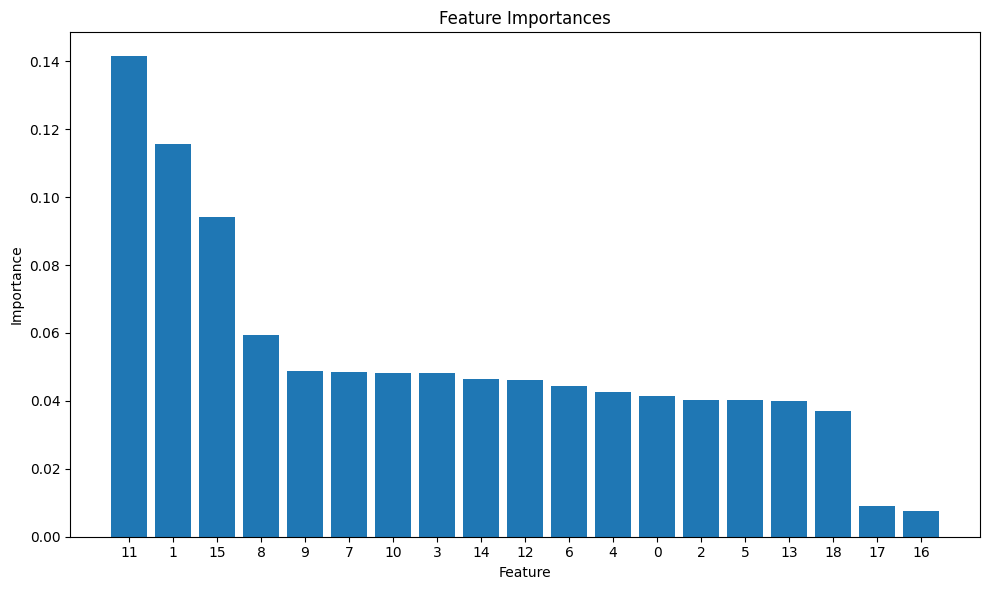

In [26]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

def RFC_cross_val(X, Y, feature_count, n_splits=5, random_state=42):
    RFC = RandomForestClassifier(random_state=random_state)

    RFC.fit(X, Y)
    feature_importances = RFC.feature_importances_
    sorted_feature_indices = feature_importances.argsort()[::-1]
    selected_feature_indices = sorted_feature_indices[:feature_count]
    X_selected = X.iloc[:, selected_feature_indices]

    # K-Fold crossvalidation
    kf = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    accuracies = []
    for train_idx, test_idx in kf.split(X_selected):
        X_train, X_test = X_selected.iloc[train_idx], X_selected.iloc[test_idx]
        y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]

        RFC.fit(X_train, y_train)
        y_pred = RFC.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Average accuracy and its standard deviation
    mean_accuracy = np.mean(accuracies) * 100
    std_accuracy = np.std(accuracies) * 100
    print(f"Mean accuracy: {mean_accuracy:.2f}% +/- {std_accuracy:.2f}%")

    importances = RFC.feature_importances_
    feature_names = list(X_selected.columns)
    plot_feature_importances(importances, feature_names)

feature_count = 19  # optimal amount of selected features for RF model performance
RFC_cross_val(X_st, Y, feature_count)


In [26]:
X.shape

(49486, 20)

In [24]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

def RFC_cross_val(X, Y, feature_count, n_splits=5, random_state=42):
    RFC = RandomForestClassifier(random_state=random_state)

    RFC.fit(X, Y)
    feature_importances = RFC.feature_importances_
    sorted_feature_indices = feature_importances.argsort()[::-1]
    selected_feature_indices = sorted_feature_indices[:feature_count]
    X_selected = X.iloc[:, selected_feature_indices]

    # K-Fold crossvalidation
    kf = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    accuracies = []
    for train_idx, test_idx in kf.split(X_selected):
        X_train, X_test = X_selected.iloc[train_idx], X_selected.iloc[test_idx]
        y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]

        RFC.fit(X_train, y_train)
        y_pred = RFC.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    with open('modelsv5/model_pre.pkl', 'wb') as file:
        pickle.dump(RFC, file)

    # Average accuracy and its standard deviation
    mean_accuracy = np.mean(accuracies) * 100
    std_accuracy = np.std(accuracies) * 100
    print(f"Mean accuracy: {mean_accuracy:.2f}% +/- {std_accuracy:.2f}%")

    #importances = RFC.feature_importances_
    #feature_names = list(X_selected.columns)
    #plot_feature_importances(importances, feature_names)

feature_count = 19  # optimal amount of selected features for RF model performance
RFC_cross_val(X_st, Y, feature_count)


Mean accuracy: 90.64% +/- 0.28%


In [23]:
#import pickle
with open('modelsv5/model_pre.pkl', 'wb') as file:
    pickle.dump(RFC, file)

NameError: name 'RFC' is not defined

In [29]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

def RFC_cross_val(X, Y, feature_count, n_splits=5, random_state=42):
    RFC = RandomForestClassifier(random_state=random_state)

    #RFC.fit(X, Y)
    #feature_importances = RFC.feature_importances_
    #sorted_feature_indices = feature_importances.argsort()[::-1]
    #selected_feature_indices = sorted_feature_indices[:feature_count]
    #X_selected = X.iloc[:, selected_feature_indices]
    X_selected = X

    # K-Fold crossvalidation
    kf = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    accuracies = []
    for train_idx, test_idx in kf.split(X_selected):
        X_train, X_test = X_selected.iloc[train_idx], X_selected.iloc[test_idx]
        y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]

        RFC.fit(X_train, y_train)
        y_pred = RFC.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    with open('modelsv5/model_pre.pkl', 'wb') as file:
        pickle.dump(RFC, file)

    # Average accuracy and its standard deviation
    mean_accuracy = np.mean(accuracies) * 100
    std_accuracy = np.std(accuracies) * 100
    print(f"Mean accuracy: {mean_accuracy:.2f}% +/- {std_accuracy:.2f}%")

    #importances = RFC.feature_importances_
    #feature_names = list(X_selected.columns)
    #plot_feature_importances(importances, feature_names)

feature_count = 19  # optimal amount of selected features for RF model performance
RFC_cross_val(X_st, Y, feature_count)


Mean accuracy: 90.67% +/- 0.31%


In [28]:
X_st.shape

(49486, 20)

In [30]:
with open('modelsv5/model_pre.pkl', 'rb') as file:
        modelz = pickle.load(file)

In [33]:
np.reshape(X_st.loc[0],(1,20))

array([[-0.24713417, -1.17422895, -0.39876005,  0.12259598, -0.41205575,
        -0.14995974, -0.12971473,  0.8275623 , -0.56566142,  1.26538333,
         0.54159622, -1.15416589, -1.04048823, -0.79279932, -0.26184647,
        -0.11746558, -0.53624425,  0.87920005,  0.19665057, -0.17520242]])

In [40]:
modelz.predict(np.reshape(X_st.loc[120],(1,20)))

array([1])

In [ ]:
RFC.predict(X_test)